In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

/home/sasha/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv ('data_glass.txt', sep=',', names = ['ID','RI','NA2O','MGO','AL2O3','SIO2','K2O','CAO','BAO','FE2O3','TYPE'])
print(data.shape)
data.head()

(214, 11)


,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
X_col = [col for col in data.columns if col != 'TYPE' and col != 'ID']
X = data[X_col]
y = data['TYPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [6]:
n_n = [int(n) for n in range(1,51)]
Y = []
scores = []
for n in n_n:
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train)
    pred = neigh.predict_proba(X_test)
    t = log_loss(y_test, pred)
    Y.append(t)
    scores.append([t, n])
print (sorted(scores)[0])

[0.8684840579814874, 13]


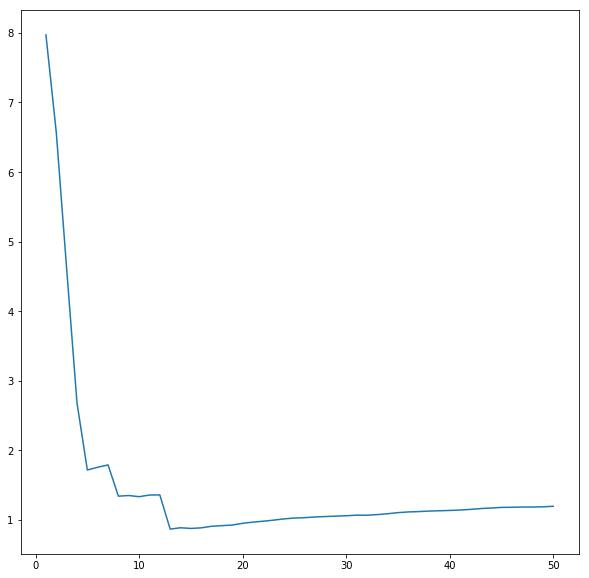

In [7]:
plt.figure(figsize = (10, 10))
plt.plot(n_n, Y)
plt.show()

In [8]:
n_n = [int(n) for n in range(1,51)]
Y = []
scores = []
for n in n_n:
    clf = DecisionTreeClassifier(max_depth=n)
    clf.fit(X_train, y_train)
    pred = clf.predict_proba(X_test)
    t = log_loss(y_test, pred)
    Y.append(t)
    scores.append([t, n])
print (sorted(scores)[0])

[1.1975418778602676, 1]


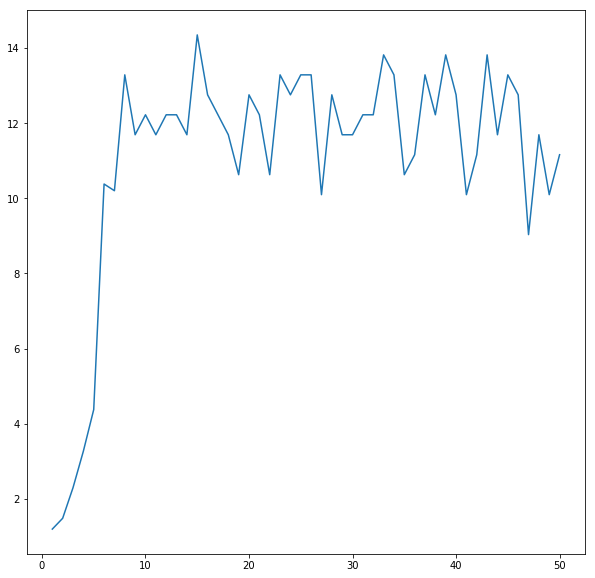

In [9]:
plt.figure(figsize = (10, 10))
plt.plot(n_n, Y)
plt.show()